# ECE 143 Individual Project
## Analysis of Ad-Hoc Communications Network
**Name**: Shijia Shu

**Student ID**: A99040010


## Problem Statement

You have been asked to help with planning an ad-hoc communications network over a large rectangular region. Each individual tower can monitor a rectangular subsection of a specific
width and height. The main problem is that none of the individual towers can provide
coverage for the entire region of interest. Communications towers are unreliable and are put
up independently and at random. You have no control over where or how big a tower’s
footprint is placed. Importantly, due to technical issues such as cross-talk, no individual
rectangular subsection can have multiple towers providing coverage for it. That is, there can
be no overlap between any pair of rectangular subsections provided by the two respective
towers. In any case, the desire is to maximize the coverage area of any available
communications tower.

The order of when the towers come online is important. Once a tower has acquired its
rectangular section, no subsequent tower can overlap that section. You may assume the
following for this problem:
* All rectangular sections have integer-based corners.
* All rectangular sections must be contained in the overall rectangular footprint.
* The height and width of each rectangular section is sampled from a uniform
distribution.
* Positions of the windows are also determined by uniform random distribution.
* All footprints must be rectangles (not general polygons).
* When a new tower comes online, if its coverage rectangle intersects the pre-existing
composite footprint, then that new tower’s coverage is trimmed such that its
maximum remaining coverage area is retained (see sequential diagram below).

Write a detailed Jupyter notebook that implements a solution to this problem such that the
user can supply the following overall size of desired coverage footprint and then determine
the following:
* Given an overall desired coverage footprint and a sequence of n communications
towers, what is the resulting resolved coverage?
* What is the total area of coverage relative to the desired total coverage area of the
original footprint? That is, are there any gaps in coverage?
* On average, how many communications towers are required before full coverage is
obtained?

**Import All Libries and Packages:**

In [3]:
import sys
import os
import math
sys.path.append(os.path.join(os.getcwd(),"packages"))
import adhoc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
reload(adhoc)

<module 'adhoc' from '/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE143/Individual-Project/ECE143-Individual-Project/packages/adhoc.pyc'>

## Introduction and Definition

How to define the desired coverage region and tower coverage?


The **Desired Region of Coverage** is defined as an canvas initialize with length and width.

Region Size = 100 x 80
Coordinate (0,0) start from the top left conner


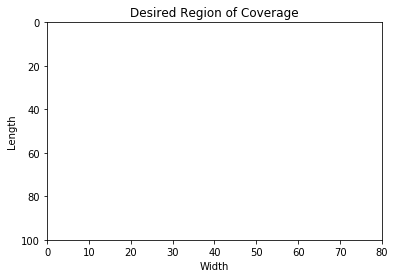

In [6]:
# To Demo the Rectangle Region
%matplotlib inline
length = 100
width = 80
fig0, ax0 = adhoc.draw_region(region_size=(length, width))
print "Region Size = {0} x {1}".format(length, width)
print "Coordinate (0,0) start from the top left conner"
ax0.set(xlabel='Width', ylabel='Length',
        title='Desired Region of Coverage')
display(fig0)
#fig0.savefig("pics/Region_demo_100_80.png")

The **Tower** are represented as rectangle with the upper left conner location, length and width. 

The format for **Tower** is represneted as dictionary: 

**```Tower = {'loc': (x, y), 'length': length, 'width': width}```**

where (x, y) is the coordinates for the upper left conner of rectangle. length and width represent the length and width of the rectangle.

Tower Upper Conner Location =  (20, 10)
Tower Length =  40
Tower Width =  50


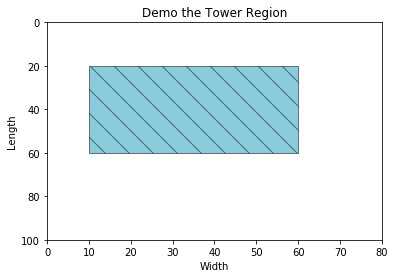

In [7]:
# To Demo the Tower Region
%matplotlib inline
print "Tower Upper Conner Location = ", (20,10)
print "Tower Length = ", 40
print "Tower Width = ", 50
Tower_demo = {'loc': (20, 10), 'length': 40, 'width': 50}
adhoc.draw_tower(ax0, tower=Tower_demo)
#fig0.savefig("pics/Tower_demo_100_80.png")
ax0.set(xlabel='Width', ylabel='Length',
        title='Demo the Tower Region')
display(fig0)

## Demos for Functions in adhoc module

### Functions in adhoc.py module:
_Brief description of the function (Details in the adhoc.py module.)_
   * **generate_rand_num(lower, upper)** :  Randomly select one number from the supplied range/bounds(inclusive).   Sampled from a uniform distribution.
   * **generate_region(length, width)** : To generate the desired coverage region given the length and width
   
   * **generate_tower(region_size)** : To generate the tower given the the desired coverage region size (length, width).
   * **place_tower(region, tower)** : To directly place the tower on the region of interests and update the coverage.
   * **trim_tower(region, tower)**: To trim the overlapping area on the region of interests. 
       * **find_max_rect(region)** : Helper function to find the largest area of rectangle in the non-overlapping area.
           * **max_histogram_area(histogram, row)** : Helper function to use the histogram method to find the largest rectangle. (Explanation in following sections.)
   * **full_coverage_generation(region, display=False)** : To keep installing tower till the desired region has been fully covered.
   * **coverage_generation(region, tower_num, display=False)** : To install the number of tower on the desired region specified by user.
   * **full_coverage_generation(region, display=False)** : To install communication towers till the region has been fully covered.
   * **average_tower_needed(length, width, max_iter=20)** : To calculate the average number of tower needed for given length and width of the region. The user can also specify the total number of runs (Default set to 20).
   * **draw_region(region_size, display=False)** : To create the initial region/canvas for user to add towers.
   * **draw_tower(ax, tower, color_selection=None)** To draw tower on the previous created region map.
   


##### Demonstration for ```generate_region(), generate_tower(), place_tower()```

Demo for generate_region(length, width)
Region Size = 10 x 10


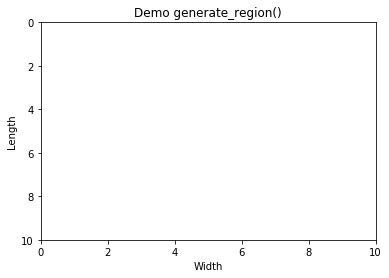

Demo for generate_tower() and place_tower()
Tower0 =  {'loc': (0, 2), 'length': 10, 'width': 8}


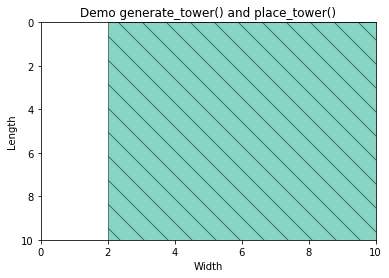

In [8]:
reload(adhoc)
region_length, region_width = 10,10
# generate_region()
region = adhoc.generate_region(region_length, region_width)
print "Demo for generate_region(length, width)"
print "Region Size = {0} x {1}".format(region_length, region_width)
fig1, ax1 = adhoc.draw_region(region.shape)
# generate_tower()
tower0 = adhoc.generate_tower(region.shape)
ax1.set(xlabel='Width', ylabel='Length',
        title='Demo generate_region()')
display(fig1)
print "Demo for generate_tower() and place_tower()"
print "Tower0 = ", tower0
# place_tower()
region_update = adhoc.place_tower(region, tower0)
ax1 = adhoc.draw_tower(ax1, tower0)
ax1.set(xlabel='Width', ylabel='Length',
        title='Demo generate_tower() and place_tower()')
display(fig1)

##### Demonstration for ```trim_tower(), find_max_rect() and max_histogram_area(histogram, row) ```
For demonstration, I created and installed four towers in sequential order to show the trim_tower() work as expected.

Region Size: 10x10


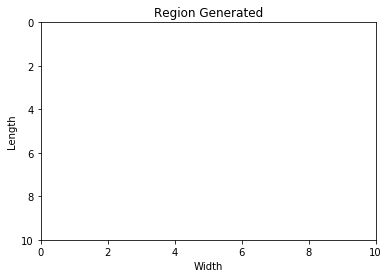

Tower1 =  {'loc': (6, 6), 'length': 2, 'width': 3}


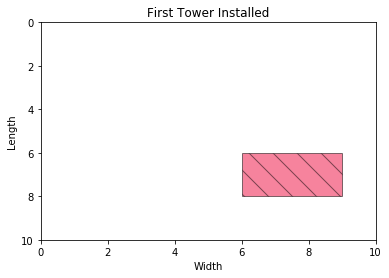

Initial Tower2(Overlapping) =  {'loc': (7, 3), 'length': 3, 'width': 6}


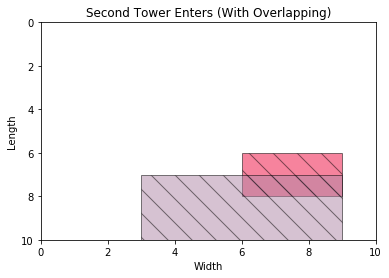

The tower coverage area after trimming:  12
Trimmed Tower2 =  {'loc': (8, 3), 'length': 2, 'width': 6}


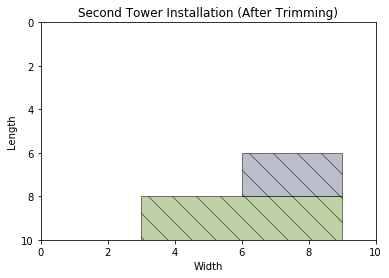

Tower3 =  {'loc': (2, 4), 'length': 2, 'width': 4}


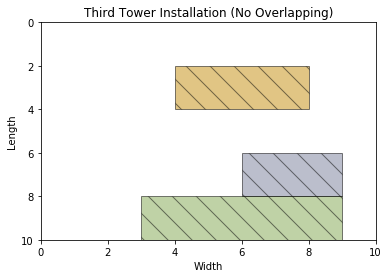

Initial Tower4(Overlapping) =  {'loc': (1, 1), 'length': 8, 'width': 6}


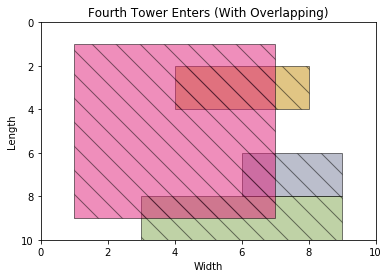

The tower coverage area after trimming:  21
Trimmed Tower4 =  {'loc': (1, 1), 'length': 7, 'width': 3}


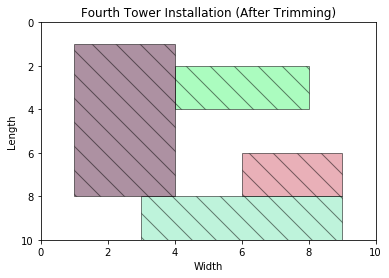

In [9]:
%matplotlib inline
reload(adhoc)
# generate region
region = adhoc.generate_region(region_length, region_width)
fig1, ax1 = adhoc.draw_region(region.shape)
fig2, ax2 = adhoc.draw_region(region.shape)
fig3, ax3 = adhoc.draw_region(region.shape)
ax1.set(xlabel='Width', ylabel='Length',
        title='Region Generated')
# create towers
tower1 = {'loc': (6, 6), 'length': 2, 'width': 3}
tower2 = {'loc': (7, 3), 'length': 3, 'width': 6}
tower3 = {'loc': (2, 4), 'length': 2, 'width': 4}
tower4 = {'loc': (1, 1), 'length': 8, 'width': 6}
print "Region Size: {}x{}".format(region_length, region_width)
display(fig1)

# Install first tower
region = adhoc.place_tower(region, tower1)
ax1 = adhoc.draw_tower(ax1, tower1)
ax2 = adhoc.draw_tower(ax2, tower1)
ax3 = adhoc.draw_tower(ax3, tower1)
ax1.set(xlabel='Width', ylabel='Length',
        title='First Tower Installed')
print "Tower1 = ", tower1
display(fig1)

# Place the second Tower(Overlapping)
region_new = adhoc.place_tower(region, tower2)
adhoc.draw_tower(ax1, tower2)
ax1.set(xlabel='Width', ylabel='Length',
        title='Second Tower Enters (With Overlapping)')
print "Initial Tower2(Overlapping) = ", tower2
display(fig1)
# Trim tower and update the second Tower coverage
tower_area, tower_trimmed = adhoc.trim_tower(region_new, tower2)
region = adhoc.place_tower(region, tower_trimmed)
ax2 = adhoc.draw_tower(ax2, tower_trimmed)
ax3 = adhoc.draw_tower(ax3, tower_trimmed)
ax2.set(xlabel='Width', ylabel='Length',
        title='Second Tower Installation (After Trimming)')
print "The tower coverage area after trimming: ", tower_area
print "Trimmed Tower2 = ", tower_trimmed
display(fig2)

# Place Third and Fourth Towers
region = adhoc.place_tower(region, tower3)
ax2 = adhoc.draw_tower(ax2, tower3)
ax2.set(xlabel='Width', ylabel='Length',
        title='Third Tower Installation (No Overlapping)')
ax3 = adhoc.draw_tower(ax3, tower3)
print "Tower3 = ", tower3
display(fig2)
region_update = adhoc.place_tower(region, tower4)
ax2 = adhoc.draw_tower(ax2, tower4)
ax2.set(xlabel='Width', ylabel='Length',
        title='Fourth Tower Enters (With Overlapping)')
print "Initial Tower4(Overlapping) = ", tower4
display(fig2)
# Trim and update the fourth Tower coverage
tower_area, tower_trimmed = adhoc.trim_tower(region_update, tower4)
region = adhoc.place_tower(region, tower_trimmed)
ax3 = adhoc.draw_tower(ax3, tower_trimmed)
print "The tower coverage area after trimming: ", tower_area
print "Trimmed Tower4 = ", tower_trimmed
ax3.set(xlabel='Width', ylabel='Length',
        title='Fourth Tower Installation (After Trimming)')
display(fig3)

## Algorithm on placing tower and trimming to get maximum coverage
##### Explanation on placing tower：
I choose to use a 2d matrix to represent the rectangle, since we are only dealing with integers in the area. 

The matrix is initalized as all zeros at the beginning: 
```python
 0 0 0 0 0
 0 0 0 0 0 
 0 0 0 0 0
 0 0 0 0 0
 0 0 0 0 0
```
After place the tower, all the coverage area will increment by one:

Example: 

Tower at: ```(1,1) with length = 2, width = 2```
```python
 0 0 0 0 0
 0 1 1 0 0 
 0 1 1 0 0
 0 0 0 0 0
 0 0 0 0 0
```
Suppose another tower placed at the region demonstrated above, the overlapping area will appear as 2.

Example: 

Tower at: ```(2,2) with length = 3, width = 2```
```python
 0 0 0 0 0
 0 1 1 0 0 
 0 1 2 1 1
 0 0 1 1 1
 0 0 0 0 0
```
Next we will only focus on the area where the most recent generated tower. The overlapping area will be set to 0 in order to perform the `find_max_rect()` algorithm.

Example:

Focus on the tower area:
```python
 2 1 1  -->  0 1 1
 1 1 1       1 1 1
```

##### Explanation on `max_histogram_area()`：

Consider we have an histogram represented as a list [1, 2, 3, 1, 2]. We can visualize it as a histogram plot(As showed below). Then we can exhaustively search through the histogram to find all the possible combination of rectangles. By end of the search we will get the rectagle with largest area and the location information of that rectangle. In this example we can tell the largest possible rectangle has area 5 (Marked in red box below). 


![Figure1](pics/hist_12312.png)

##### Explanation on `find_max_rect()`：
By utilizing the `max_histogram_area()` as the helper function, we can run this algorithm on each line of the region to find the maximum rectangle in the overall region of interests.

Example: To run this algorithm on the previous example, 

We first need to update the previous matrix by loop through all the lines in that matrix:

```
Step 1: Find maximum area for row[0]
Step 2:
    for each row in 1 to N - 1
        for each column in that row
            if A[row][column] == 1
              update A[row][column] with
                A[row][column] += A[row - 1][column]
    find area for that row
    and update maximum area so far
```

[**Reference**](https://www.geeksforgeeks.org/maximum-size-rectangle-binary-sub-matrix-1s/)
```
0 1 1  --> 0 1 1 
1 1 1      1 2 2
```
Next on each line we run the `max_histogram_area()` to find the maximum rectangle area.
After this step, we will be able to obtain an matrix representation of the largest non-overlappying rectangle.
```
0 1 1  --> 0 1 1
1 2 2      0 1 1
```
Finally, we get a trimmed version of the tower and we can add it back to the original region.
```
 0 0 0 0 0       0 0 0 0 0
 0 1 1 0 0  -->  0 1 1 0 0
 0 1 1 0 0       0 1 1 1 1
 0 0 0 0 0       0 0 0 1 1
 0 0 0 0 0       0 0 0 0 0 
```
The above two helper functions are used for trimming to get the maximum tower coverage when overlapping with previous installed tower coverage.

In [10]:
%%script false
# Do not need to be run
# To draw the Histogram representation
fig, ax = adhoc.draw_region((5,5))
a = {'loc': (4, 0), 'length': 1, 'width': 1}
b = {'loc': (3, 1), 'length': 2, 'width': 1}
c = {'loc': (2, 2), 'length': 3, 'width': 1}
d = {'loc': (4, 3), 'length': 1, 'width': 1}
e = {'loc': (3, 4), 'length': 2, 'width': 1}

ax = adhoc.draw_tower(ax, tower=a, color_selection='b')
ax = adhoc.draw_tower(ax, tower=b, color_selection='b')
ax = adhoc.draw_tower(ax, tower=c, color_selection='b')
ax = adhoc.draw_tower(ax, tower=d, color_selection='b')
ax = adhoc.draw_tower(ax, tower=e, color_selection='b')
ax.set(xlabel='Width', ylabel='Length',
        title='[1, 2, 3, 1, 2] representation as histogram')
display(fig)

## Solution to the Problem

#### 1. Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?
#### 2. What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?



* **`full_coverage_generation()` :** 

**The user can provide the length and width of the desired coverage. This function will keep filling out the region till it is completely covered.** 

**_Bonus_**: This function can also return all the tower object if user what to know the where of each tower being installed and its individual coverage.

The desired coverage area:  2500
Total tower used:  121
The overall percentage of coverage area:  100.0 %
The Final coverage area:  2500


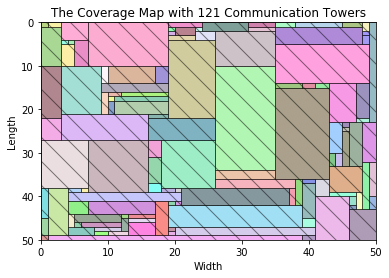

In [12]:
reload(adhoc)
# ----------------User input-------------------
Desired_coverage = (50, 50) # (length, width)
# ---------------------------------------------
region = adhoc.generate_region(Desired_coverage[0], Desired_coverage[1])
coverage_area, coverage_map, percent_coverage, tower_list = adhoc.full_coverage_generation(region, display=True, debug=False)
print "The Final coverage area: ", coverage_area

* **`coverage_generation()` :** 

**The user can provide the length and width of the desired coverage and n communication towers. This function will keep filling out the region till used all the towers. The function will terminte if full coverage has been reached.** 

**_Bonus_**: This function can also return all the tower object if user what to know the where of each tower being installed and its individual coverage.

The desired coverage area:  100
Total tower used:  10
The overall percentage of coverage area:  52.0 %
The Final coverage area:  52


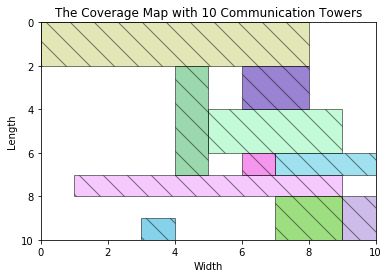

In [15]:
reload(adhoc)
# ----------------User input-------------------
Desired_coverage = (10, 10) # (length, width)
N_towers = 10 # n communication towers
# ---------------------------------------------
region = adhoc.generate_region(Desired_coverage[0], Desired_coverage[1])
coverage_area, coverage_map, percent_coverage, tower_list = adhoc.coverage_generation(region, N_towers , display=True)
print "The Final coverage area: ", coverage_area

#### 3. On average, how many communications towers are required before full coverage is obtained?


* **`average_tower_needed()` :** 

**The user can provide the length and width of the desired coverage. This function will repeat the `full_coverage_generation()` and calculate the average number of towers needed to reach full coverage.** 

In [16]:
reload(adhoc)
# ----------------User input-------------------
length, width = (20, 20) #(length, width)
# ---------------------------------------------
avg = adhoc.average_tower_needed(length, width, max_iter=20)

The average number of communication towers needed:  54


## Conclusion

The solutions showed above successfully demonstrated the functionalities for three main objectives. For any given region size, the program will find the combination of towers needed to provide full or partial coverage to the region depending on the user's preferences. The last function also give the user a sense of how many towers needed for the desired region to be fully covered. However, this program could be optimized to improve the calculation time and space complexity. The current version normally needs less than 30 seconds for region size less than 10,000. With the increase of the region size, the computation time increased exponentially. The space complexity is pretty high for my algorithm due to the reason to genreate the region canvas multiple time. 